##### Algorithms and Data Structures (Winter - Spring 2022)

* [Table of Contents](ADS_TOC.ipynb)
* <a href="https://colab.research.google.com/github/4dsolutions/elite_school/blob/master/ADS_highschool_math.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
* [![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.org/github/4dsolutions/elite_school/blob/master/ADS_highschool_math.ipynb)

# High School Mathematics

High school mathematics is a moving target and to track it is to change it, if only by adding to one's awareness of where we've been.  Nor does every subculture follow the same evolutionary path.  The Republic of South Africa, which I've had the privilege of visiting, faces a different set of challenges than California or Oregon.  Different, yet partially overlapping.

One entry point into the many debates is the role of technology and how should it be used.  

In this Jupyter Notebook, we look at the actual and/or potential role of Jupyter Notebooks along with their wider ecosystem.  Historically speaking, they developed from the Python world as I-Python Notebooks.  

Nowadays, Jupyter Notebooks may be used to introduce several computer languages.  But what do computer languages have to do with mathematics?  Nothing?  

## The Function and The Set

In the several states of North America, the pre-college curriculum saw a sudden infusion of new rigor in the early 1960s, from specific corners (SMSG, University of Chicago), aimed at bolstering the sophistication of American children.  Elementary schoolers tackled the union and intersection of sets, and in algebra took up "functions" in a more serious and formal way. 

The arithmetic of grocery shopping, savings, managing a farm, was being displaced by what they called the New Math.  Some joked about it, others found it too menacing to be a laughing matter.

Sets would be our primary data structures going forward and these included the progressively more encompassing, all of them infinite, sets of number types:  

* Counting Numbers, or set $\mathbb{N}$ 
* Whole Numbers $\mathbb{W}$
* Integers $\mathbb{Z}$
* Rationals $\mathbb{Q}$
* Reals $\mathbb{R}$ 
* Complex numbers $\mathbb{C}$ 

each a superset of the next previous.

$$
\mathbb{N} \subset  
\mathbb{W} \subset 
\mathbb{Z} \subset 
\mathbb{Q} \subset 
\mathbb{R} \subset 
\mathbb{C}
$$

The Naturals break up into Primes and Composites.  The Reals break up into Rationals and Irrationals, amidst a lot of philosophy.  Irrationals include the Transcendentals.

Functions, a subtype of Relations, define puzzles regarding finding their "roots" or "zeros" along with local "minima" and "maxima".   More generally, they're but mappings, of a domain set to a range set, with ballistics metaphors implied. 

The "solution space" would be with respect to one of these number sets, if indeed numbers were at the heart of the solving algorithm.  Complex numbers give us the ability to find the n roots of an equation to the nth degree.  They would give us the complex plane and the ability to visualize fractals.  They would integrate deeply with trig, by way of exponentials and logarithms.

## Plotting

The function we usually come to, as a pre-requisite for calculus, is the polynomial.  Before we integrate or differentiate such a curve, we learn to (a) plot it on graph paper (i.e. the screen) and (b) to find its roots, or zeros.

Plain old Python (pop) doesn't have the `linspace` or `arange` though one might code them in pure Python. Instead, why not introduce "array based computing" at the outset, with an eye towards syncing with data science tutorials and the broader Python ecosystem?  Other languages are array-based as well, enabling jumping to other languages, such as J.

The numpy package provides a context for a new kind of list object, the n-dimensional array, suitable for navigating amidst n-d polytopes (Coxeter) if that's your gig.  A lot of us stay with row by column matrix-like data structures, 2-dimensional.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Chop a number line (like making sausage) into 200 points exactly, so 199 intervals, starting and ending on the two points you give it.  Return an n-d array of only one dimension, as shown by `obj.shape`.

In [2]:
rat_domain = np.linspace(-5, 5, 200)  # rational domain, expressed in floating points

In [3]:
print("Length: ", len(rat_domain))
print("d-type: ", rat_domain.dtype)
print(" Shape: ", rat_domain.shape)
print("   Dim: ", rat_domain.ndim)

Length:  200
d-type:  float64
 Shape:  (200,)
   Dim:  1


The code below looks like ordinary Python, however if `domain` then powering (`**`) will by applied element-wise to all 200 data points, with no explicit looping required.  This is what array-based computing entails:  working with whole rafts of numbers without explicitly iterating over them.

In [4]:
def power_curve(domain, the_power):
    return domain ** the_power

In [5]:
out_range_1 = power_curve(rat_domain, 1) # linear relationship 

In [6]:
out_range_2 = power_curve(rat_domain, 2) # 2nd power, parabola

In [7]:
out_range_3 = power_curve(rat_domain, 3) # 3rd power, inflection point

And now for our final star player: pandas.  The pandas package is home to a Series, a single column of data, of any data type.  Series objects standing side-by-side, define the DataFrame, a  spreadsheet analog, inspired by R (a grand daddy workhorse language in statistics world, still going strong, works with Jupyter).

In [8]:
import pandas as pd

In [9]:
table = pd.DataFrame({1:out_range_1, 
                      2:out_range_2, 
                      3:out_range_3},
                      index = rat_domain)
table.head()

,1,2,3
-5.000000,-5.000000,25.000000,-125.000000
-4.949749,-4.949749,24.500013,-121.268907
-4.899497,-4.899497,24.005076,-117.612808
-4.849246,-4.849246,23.515189,-114.030942
-4.798995,-4.798995,23.030353,-110.522547


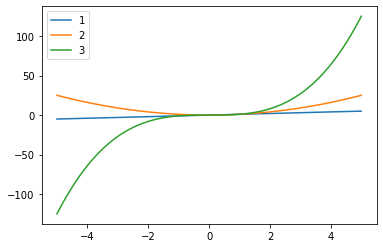

In [10]:
table.plot();

We have looked at sympy in other chapters, however maybe not in a classic high school setting, where expanding and factoring polynomials is the order of the day.  Once we have wrapped our minds around polynomial functions, we are ready to integrate and differentiate, or so the thinking goes. They lend themselves to these operations, as manual algorithms, very nicely.

In [11]:
import sympy as sp

In [12]:
x = sp.Symbol('x')
poly = (x - 3)*(x + 2)*(x - 5)*(x + 7)
poly

(x - 5)*(x - 3)*(x + 2)*(x + 7)

In [13]:
poly.expand()

x**4 + x**3 - 43*x**2 + 23*x + 210

Here's a bridge to that Lambda Calculus, in that lambda has a meaning of "any function" and in the context below, makes an expression ready to iterate through some numpy array.  It "vectorizes" in other words, a term used by numpy itself.  Without resorting to for loop constructs, or mentioning indices, the `poly` expression races through our 400 point domain, applying itself to each x.

The original domain, and the corresponding range (linked by poly), stand side by side as columns, in a pandas DataFrame.  From the DataFrame object, we may plot directly.

In [14]:
f = sp.lambdify(x, poly, 'numpy')

In [15]:
domain = np.linspace(-7.5,7.5,400)
data_f = pd.DataFrame({"f(x)": f(domain)}, 
                      index = domain)
data_f.index.name = 'x'
data_f.head()

,f(x)
x,
-7.500000,360.937500
-7.462406,329.337298
-7.424812,298.496719
-7.387218,268.406589
-7.349624,239.057783


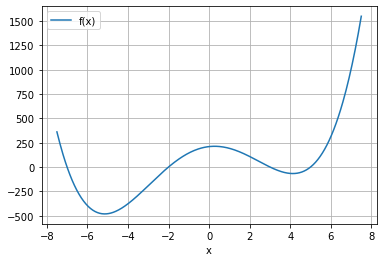

In [16]:
data_f.plot(grid=True);

## Circular Functions

From polynomials we move to the trigonometric functions and properties such as amplitude and frequency.

The grand unification of circular functions and exponential functions on the Complex plane marks another branch point, where we optionally dive into fractals.

In [17]:
domain = np.linspace(-10, 10, 400)
data_trig = pd.DataFrame({"sin(x)": np.sin(domain),
                         "cos(x)": np.cos(domain)},
                      index = domain)
data_trig.index.name = 'radians'
data_trig.head()

,sin(x),cos(x)
radians,,
-10.000000,0.544021,-0.839072
-9.949875,0.501297,-0.865275
-9.899749,0.457313,-0.889306
-9.849624,0.412181,-0.911102
-9.799499,0.366013,-0.930610


The plot we get by calling the plot method on our DataFrame (`data_trig`) with no arguments is already more than acceptable.  Capturing the output as `ax` was optional in this case, but in future examples (below), customizing title, labels and legend involve communicating with this "axes" object.  

matplotlib is is complicated package in giving us lots of objects we might want to communicate with, about line thickness, marker size, label fonts and so on. 

Your high school might refer you to various resources to help you continue broadening your vocabulary, while deepening your fluency, with this or any other package.  The math course itself might externalize some of these details.

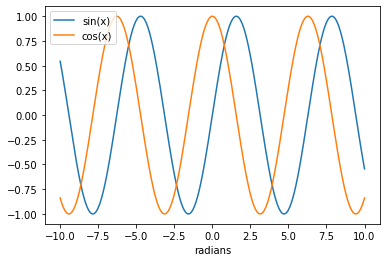

In [18]:
ax = data_trig.plot()

A jump to the topic of alternating current and hydro-dam generators as a topic would appropriately go here.  The application of circular functions to electricity concepts comes up a lot in high school physics.

The final roundup of critical functions comes with Euler's famous formula:

$$
e^{ \pm i\theta } = \cos \theta \pm i\sin \theta
$$

In [19]:
theta = sp.Symbol('theta')
expr = sp.exp(sp.I * theta)
expr

exp(I*theta)

In [20]:
euler = sp.lambdify(theta, expr, 'numpy')

In [21]:
domain     = np.linspace(0, 10, 200)  # for wrapping around and around the circle
data_euler = pd.DataFrame({"euler(r)": euler(domain)},  # r for radians
                            index = domain)
data_euler.index.name = 'radians'
data_euler.head()

,euler(r)
radians,
0.000000,1.000000+0.000000j
0.050251,0.998738+0.050230j
0.100503,0.994954+0.100333j
0.150754,0.988658+0.150183j
0.201005,0.979866+0.199654j


In [22]:
data_euler.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 200 entries, 0.0 to 10.0
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype     
---  ------    --------------  -----     
 0   euler(r)  200 non-null    complex128
dtypes: complex128(1)
memory usage: 4.7 KB


In [23]:
euler_df = data_euler.copy() # keep a backup before adding columns
euler_df["cos(r)"] = euler_df["euler(r)"].apply(lambda x: x.real)
euler_df["sin(r)"] = euler_df["euler(r)"].apply(lambda x: x.imag)

In [24]:
euler_df.head()

,euler(r),cos(r),sin(r)
radians,,,
0.000000,1.000000+0.000000j,1.000000,0.000000
0.050251,0.998738+0.050230j,0.998738,0.050230
0.100503,0.994954+0.100333j,0.994954,0.100333
0.150754,0.988658+0.150183j,0.988658,0.150183
0.201005,0.979866+0.199654j,0.979866,0.199654


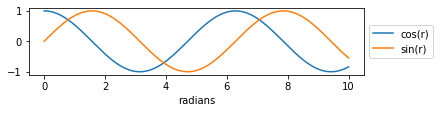

In [25]:
ax = euler_df.plot(y=["cos(r)", "sin(r)"])
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_aspect("equal")

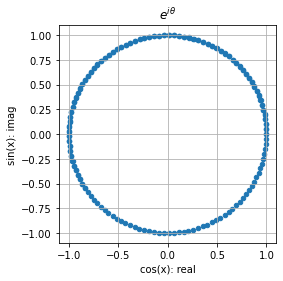

In [26]:
ax = euler_df.plot.scatter(x="cos(r)", y="sin(r)")
ax.set_aspect("equal")
ax.set_xlabel("cos(x): real")
ax.set_ylabel("sin(x): imag")
ax.set_title(r"$e^{i \theta}$")
ax.grid(True)

## Delta Calculus

The reason for calling it Delta Calculus is to get around using a proper name, such as "Newtonian", much as we're free to recapitulate his work in "fluxions".  The reader is reminded of many calculi, as maths are full of them, and room for Lambda Calculus appears, with a kind of symmetry between them.  That's to expand the meaning of both, perhaps, to embrace their destinies.

The focus I've been adopting, as a curriculum dev, is to focus on the data science curve known as the Gaussian or normal curve.  This "bell curve" is very well thought out and much studied, and its integral, the CDF, is likewise prevalent as a pattern, such as when we watch a fad sweep through a population:  early adopters, over the hump, late adopters.  How it all adds up looks like a lazy S, almost like the integral symbol itself.

Machine Learning is likewise a gateway into differential calculus as the idea of gradient descent starts quickly, with terrain metaphors.  We've all descended gradients.  We will get to slopes and tangent planes later.  Starting with complex applications then refining the concepts through simplification, of what's actually under study, is something science is good at.  Replace an organism with a single cell.  Reduce everything to group theory.

In [27]:
domain = np.linspace(-6, 6, 500)

In [28]:
x, σ, μ = sp.symbols(['x','σ', 'μ'])

In [29]:
f = sp.Symbol('f')

In [30]:
expr1 = (1/(σ * sp.sqrt(2 * sp.pi)))
expr2 = sp.exp(sp.Rational(-1,2) * ((x - μ)/σ)**2)
gaussian = expr2 * expr1
gaussian

sqrt(2)*exp(-(x - μ)**2/(2*σ**2))/(2*sqrt(pi)*σ)

Play around with $\mu$ and $\sigma$, the mean and standard deviation parameters, conventionally set to 0 and 1 respectively, for the most standard of the normal bell curves.  Play around with these.

In [31]:
standard = gaussian.copy()
standard = standard.subs(μ, 0)
standard = standard.subs(σ, 1)
standard

sqrt(2)*exp(-x**2/2)/(2*sqrt(pi))

In [32]:
IQ = gaussian.copy()
IQ = IQ.subs(μ, 100)
IQ = IQ.subs(σ, 15)
IQ

sqrt(2)*exp(-(x - 100)**2/450)/(30*sqrt(pi))

In [33]:
domain = np.linspace(-6, 6, 500)
f = sp.lambdify(x, standard, 'numpy') 
y_vals = f(domain)

In [34]:
bell_curve_df = pd.DataFrame({'x':domain, 'y':y_vals})
bell_curve_df.head()

,x,y
0,-6.000000,6.075883e-09
1,-5.975952,7.016936e-09
2,-5.951904,8.099059e-09
3,-5.927856,9.342657e-09
4,-5.903808,1.077098e-08


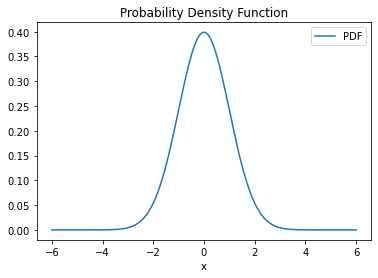

In [35]:
ax = bell_curve_df.plot(x='x', y='y')
ax.set_title("Probability Density Function");
ax.legend(['PDF']);

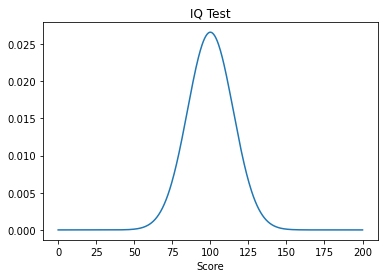

In [45]:
# create data structure
new_domain  = np.linspace(0, 200, 500)
iq_function = sp.lambdify(x, IQ, 'numpy') # IQ defined above
y_vals      = iq_function(new_domain)
iq_curve_df = pd.DataFrame({'x':new_domain, 'y':y_vals})

# plot
ax = iq_curve_df.plot(x='x', y='y', legend=None)
ax.set_xlabel("Score")
ax.set_title("IQ Test");

In [37]:
sp.integrate(standard, (x, -6, 6)).evalf(6)

1.00000

In [38]:
bell_curve_df

,x,y
0,-6.000000,6.075883e-09
1,-5.975952,7.016936e-09
2,-5.951904,8.099059e-09
3,-5.927856,9.342657e-09
4,-5.903808,1.077098e-08
...,...,...
495,5.903808,1.077098e-08
496,5.927856,9.342657e-09
497,5.951904,8.099059e-09
498,5.975952,7.016936e-09


In [40]:
h = abs(domain[0] - domain[1])
h

0.02404809619238435

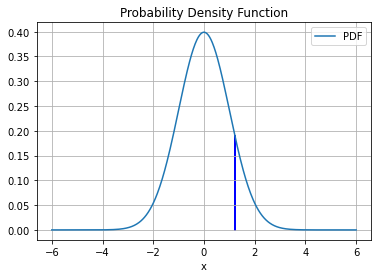

In [41]:
import matplotlib.patches as mpatches

ax = bell_curve_df.plot(x='x', y='y')
ax.set_title("Probability Density Function")
ax.grid(True)
ax.legend(['PDF'])

row = 300 # of 500 total
left, bottom, width, height = (bell_curve_df.iloc[row,0]-h/2,
                               0,h, # width h
                               bell_curve_df.iloc[row,1])
rect=mpatches.Rectangle((left,bottom),width,height, 
                        fill=True,
                        color="blue")
ax.add_patch(rect);

The cumulative sum of thin rectanglar areas, each with a PDF y-value height, times a delta h width of about 0.024, approximates the numeric integral.  

The CDF levels off at 1.0, as it should, given it's tracking the area under the standard bell curve, of probability 1 its total area.

In [42]:
bell_curve_df['CDF'] = np.cumsum(bell_curve_df['y']*h) # discrete integral

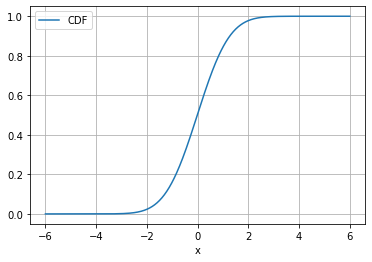

In [43]:
ax = bell_curve_df.plot(x='x', y='CDF')
ax.grid(True)

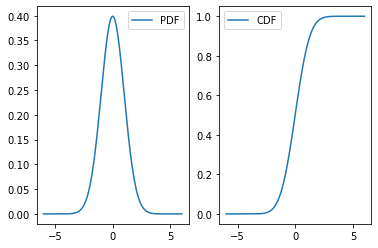

In [44]:
plt.subplots()
plt.subplot(121)
plt.plot(bell_curve_df['x'], bell_curve_df['y'])
plt.legend(['PDF'])
plt.subplot(122)
plt.plot(bell_curve_df['x'], bell_curve_df['CDF'])
plt.legend(['CDF']);